In [ ]:
import os
import pandas as pd
from merged_tickdata_20240724 import merged_new_tickdata, reinstatement_tickdata

In [ ]:
for k in ['2021']:#, '2023'
    for v in ['IH', 'IF', 'IC', 'IM', 'T', 'TF', 'TL', 'TS']:
        new_up_file = 'E:/%s888/%s888_up_%s.csv'%(v,v,k)
        new_df_file = 'E:/%s888/%s888_%s.csv'%(v,v,k)
        new_rs_df_file= 'E:/%s888/%s888_rs_%s.csv'%(v,v,k)
        sp_new_chars = '_%s'%(k)
        alpha_chars = '%s'%(v)
        print(new_up_file,new_df_file,new_rs_df_file,sp_new_chars,alpha_chars)
        # 生成按年份处理后的CSV文件
        try:
            new_up_df = pd.read_csv(str(new_up_file), encoding='utf-8')
            print('品种%s在%s年数据读取成功!'%(v,k))
        except FileNotFoundError:
            print('品种%s在%s年无数据!'%(v,k))
            continue
        new_df = merged_new_tickdata(new_up_df, alpha_chars)
        del new_up_df
        new_df.to_csv(new_df_file, index=False)
        print("按年份处理的CSV文件合并成功!")
        
        # 生成按年份处理后的CSV文件按照等差复权处理
        new_rs_df = reinstatement_tickdata(new_df)
        del new_df
        new_rs_df.to_csv(new_rs_df_file, index=False)
        print("按年份处理且进行等差复权的文件合并成功!")
        del new_rs_df
        

In [ ]:
new_up_df = pd.read_csv(r"E:\TS888\TS888_up_2022.csv", encoding='utf-8')
new_df_file = r"E:\TS888\TS888_2022.csv"
new_rs_df_file=r"E:\TS888\TS888_rs_2022.csv"
sp_new_chars = '_2022'
alpha_chars = 'TS'

In [ ]:
new_up_df.tail()

In [ ]:
new_df = merged_new_tickdata(new_up_df, alpha_chars)
del new_up_df
new_df.to_csv(new_df_file, index=False)
print("按年份处理的CSV文件合并成功!")

In [ ]:
new_df.tail()

In [ ]:
# 生成按年份处理后的CSV文件按照等差复权处理
new_rs_df = reinstatement_tickdata(new_df)
del new_df
new_rs_df.to_csv(new_rs_df_file, index=False)
print("按年份处理且进行等差复权的文件合并成功!")

In [ ]:
new_rs_df.tail()

In [ ]:
del new_rs_df

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\BaiduNetdiskDownload\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2022_5T_back_ofdata_dj.csv", encoding='utf-8')

In [3]:
df_new = df.drop(df[df['delta'] == 0].index)

In [4]:
df_new.to_csv(r"D:\BaiduNetdiskDownload\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2022_5T_back_ofdata_dj_new.csv", index=False)

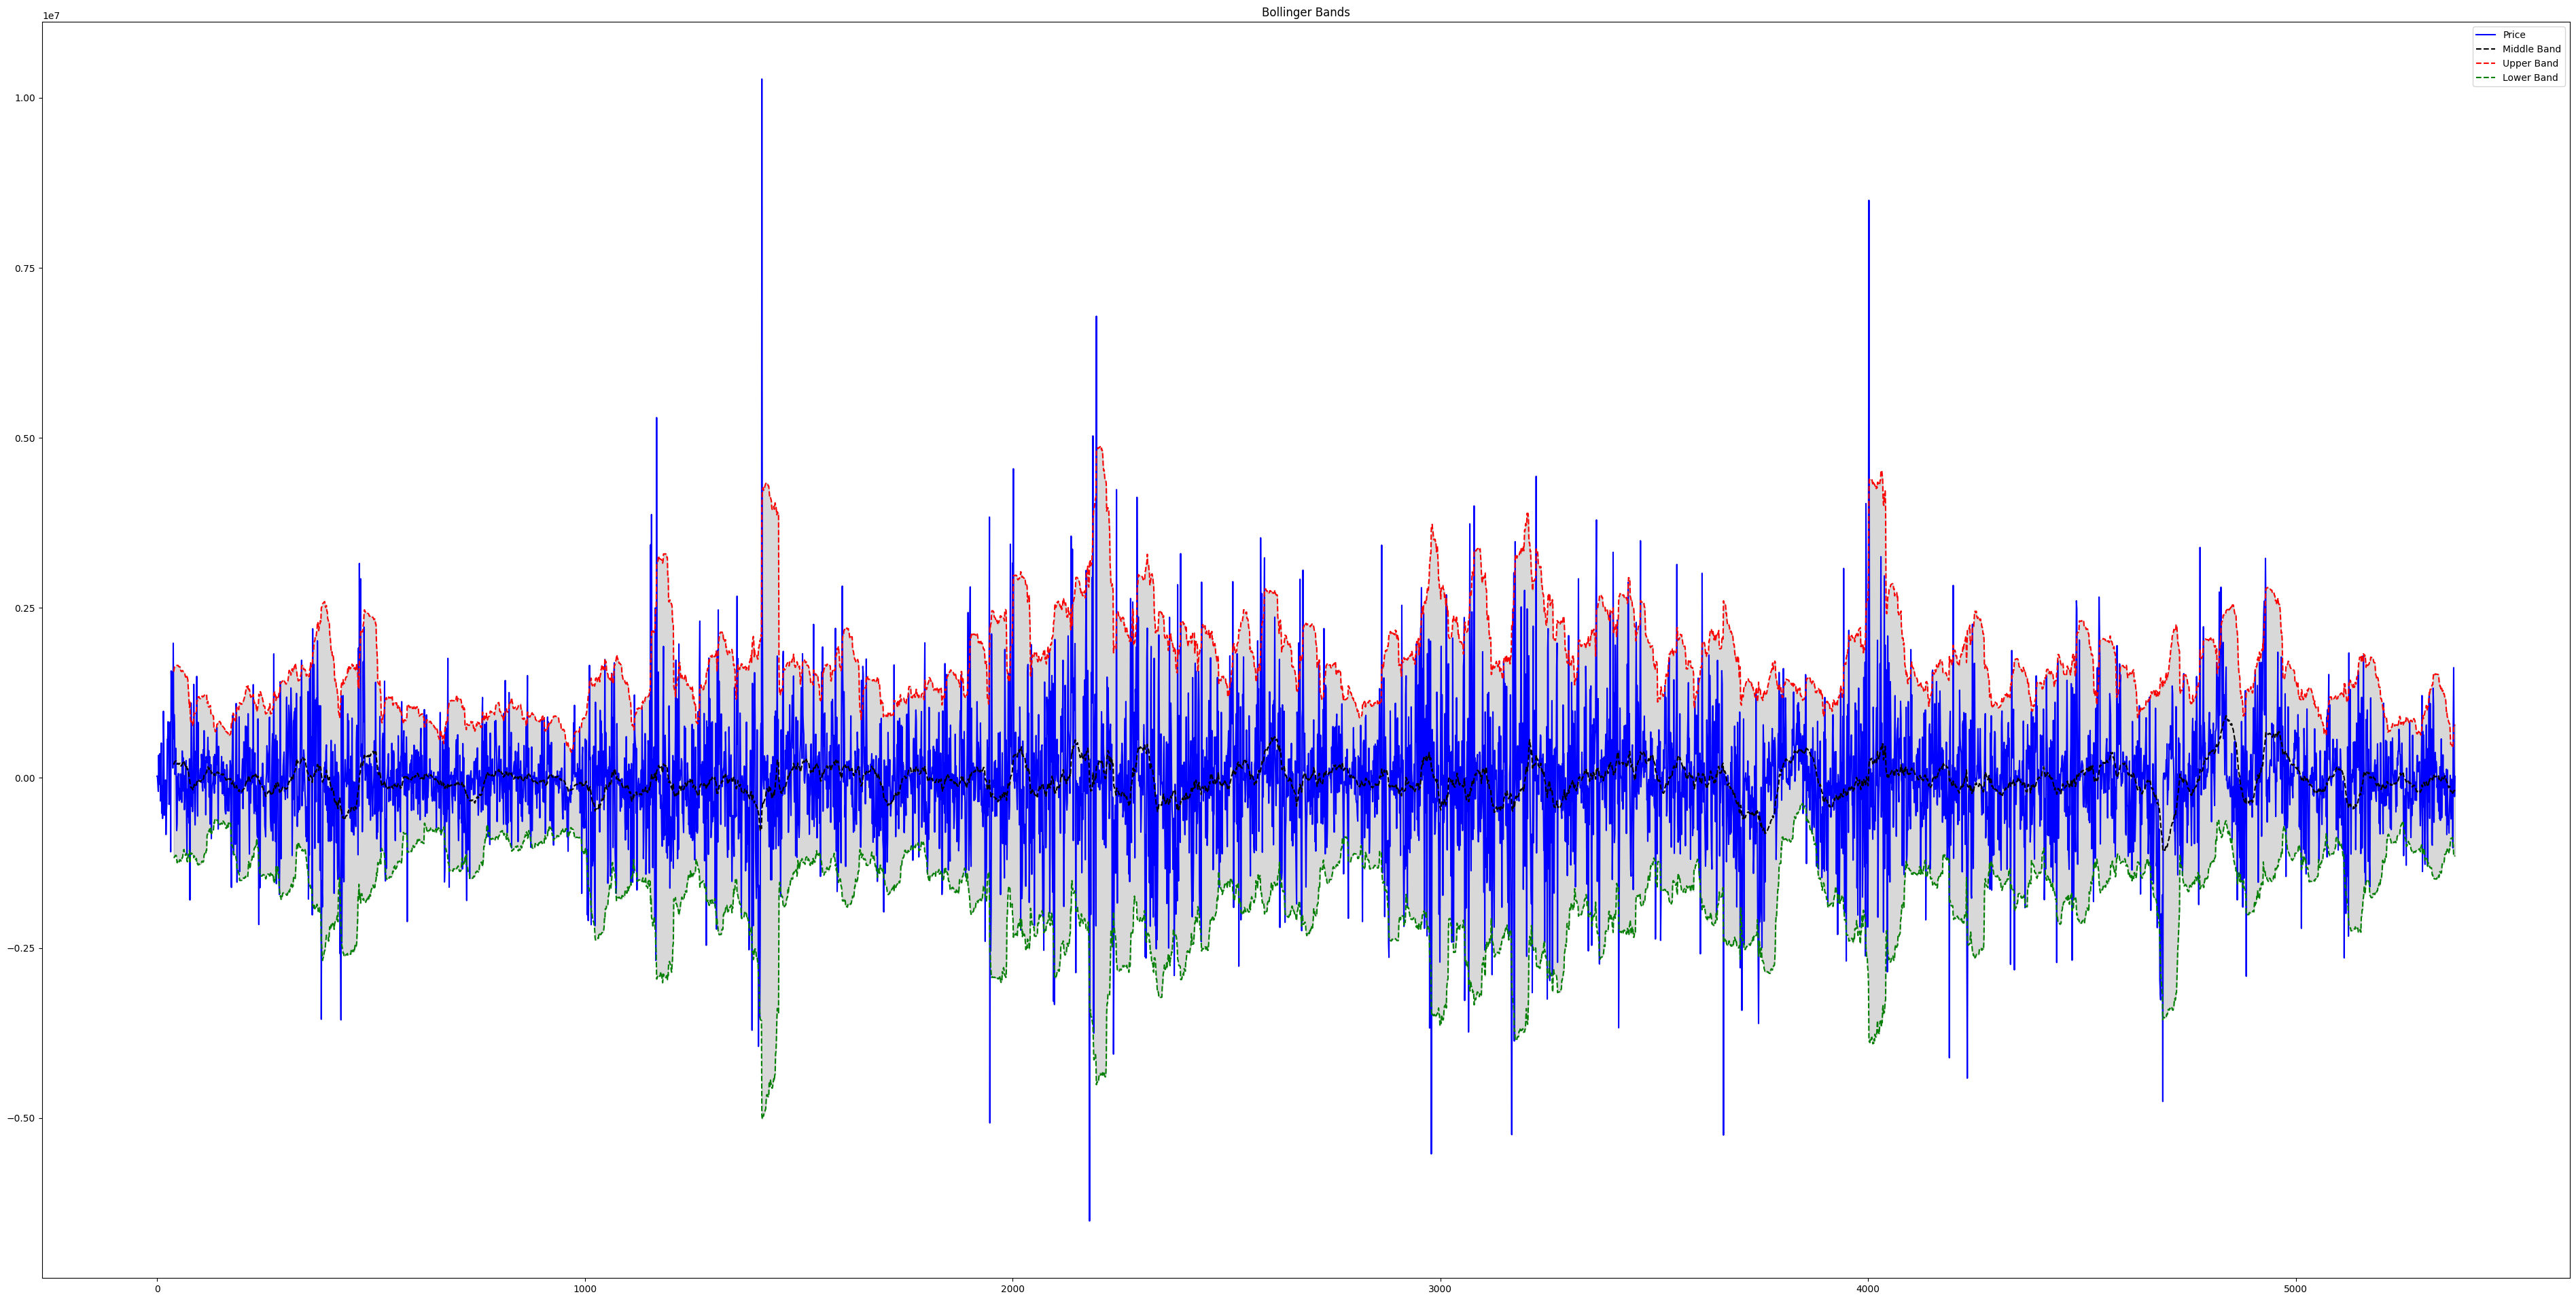

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你的 DataFrame 已经加载为 df，并且 df['a'] 是要计算布林带的数值列
df = pd.read_csv(r"D:\BaiduNetdiskDownload\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2022_5T_back_ofdata_dj_new.csv")  # 例如从CSV加载

# 计算中轨线 (通常是20日简单移动平均线)
window = 40  # 窗口大小，可以根据你的需求调整
df['Middle Band'] = df['delta'].rolling(window=window).mean()

# 计算标准差
df['Std Dev'] = df['delta'].rolling(window=window).std()

# 计算上轨线和下轨线
df['Upper Band'] = df['Middle Band'] + (2 * df['Std Dev'])
df['Lower Band'] = df['Middle Band'] - (2 * df['Std Dev'])

# 绘制图形
plt.figure(figsize=(48,24))
plt.plot(df['delta'], label='Price', color='blue')
plt.plot(df['Middle Band'], label='Middle Band', color='black', linestyle='--')
plt.plot(df['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(df['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='gray', alpha=0.3)

plt.title('Bollinger Bands')
plt.legend(loc='best')
plt.show()


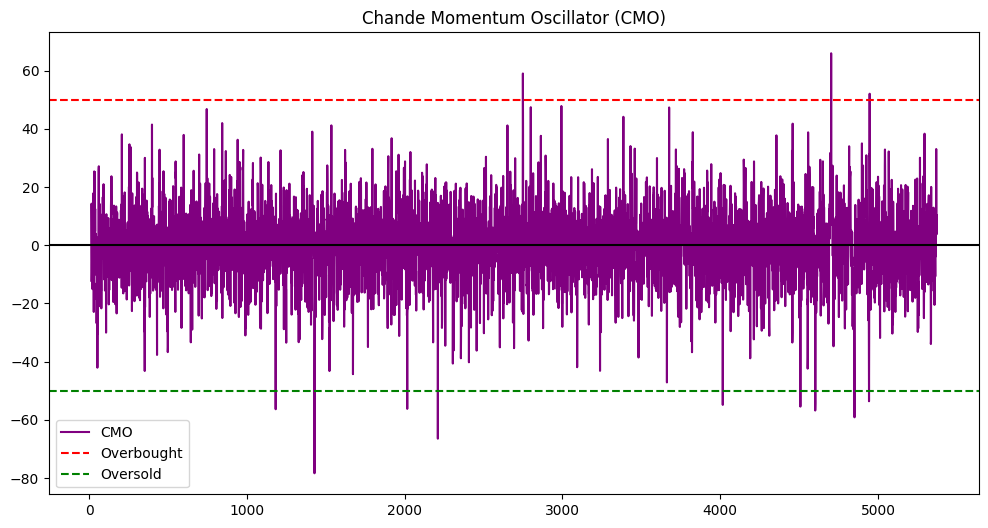

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你的 DataFrame 已经加载为 df，并且 df['a'] 是要计算CMO的数值列
df = pd.read_csv(r"D:\BaiduNetdiskDownload\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2022_5T_back_ofdata_dj_new.csv")  # 例如从CSV加载

# 定义时间窗口，通常使用14天
window = 14

# 计算价格的变化
df['Change'] = df['delta'].diff()

# 计算上升动量 U 和下降动量 D
df['U'] = np.where(df['Change'] > 0, df['Change'], 0)
df['D'] = np.where(df['Change'] < 0, -df['Change'], 0)

# 计算 U 和 D 的移动平均线
df['SMA_U'] = df['U'].rolling(window=window).mean()
df['SMA_D'] = df['D'].rolling(window=window).mean()

# 计算CMO
df['CMO'] = 100 * (df['SMA_U'] - df['SMA_D']) / (df['SMA_U'] + df['SMA_D'])

# 绘制CMO图形
plt.figure(figsize=(12,6))
plt.plot(df['CMO'], label='CMO', color='purple')

plt.title('Chande Momentum Oscillator (CMO)')
plt.axhline(y=50, color='r', linestyle='--', label='Overbought')  # 超买线
plt.axhline(y=-50, color='g', linestyle='--', label='Oversold')   # 超卖线
plt.axhline(y=0, color='black', linestyle='-')  # 中线

plt.legend(loc='best')
plt.show()


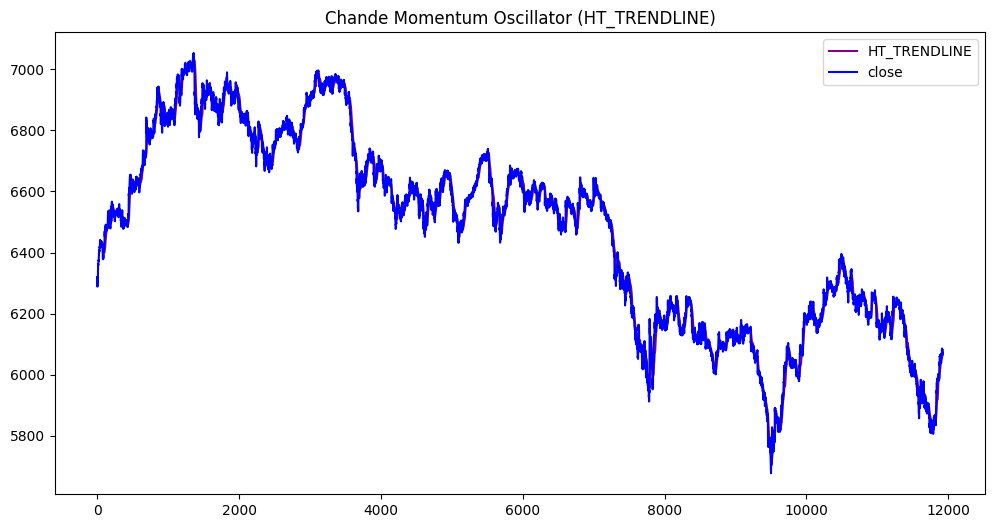

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as tb

# 假设你的 DataFrame 已经加载为 df，并且 df['a'] 是要计算CMO的数值列
df = pd.read_csv(r"E:\of_data\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2023_5T_back_ofdata_dj.csv")  # 例如从CSV加载

# 定义时间窗口，通常使用14天
window = 14

# 计算HT_TRENDLINE
df['HT_TRENDLINE'] = tb.HT_TRENDLINE(df['close'])

# 绘制CMO图形
plt.figure(figsize=(12,6))
plt.plot(df['HT_TRENDLINE'], label='HT_TRENDLINE', color='purple')
plt.plot(df['close'], label='close', color='blue')

plt.title('Chande Momentum Oscillator (HT_TRENDLINE)')
# plt.axhline(y=50, color='r', linestyle='--', label='Overbought')  # 超买线
# plt.axhline(y=-50, color='g', linestyle='--', label='Oversold')   # 超卖线
# plt.axhline(y=0, color='black', linestyle='-')  # 中线

plt.legend(loc='best')
plt.show()